# Simplify Polygon

This notebook demos how to read a polygon from a nDI polygon collection, simplify the polygon and write it back to the same polygon collection.

Author: Jie Hou Modified Date: 11/27/2020

### Import the relavant packages
- GeoIO is used to read/write the polygon
- Shapely is used to simplify the polygon

In [12]:
from geoio.geoio import  GeoIoPolygonCollection, FileMode_update, GeoIoShapeSegment
import numpy as np
from shapely import geometry
import matplotlib.pyplot as plt

### Open up Polygon Collection and read the polygon

In [3]:
POLYGONFILE = "/glb/data/siep_rii/sgsdata/usr/usjhs3/Auger/polygon/test_polygons_2_25_16.ply"

If don't want to write data back to the polygon collection, remove the flag 'FileMode_update'

In [4]:
poly_collection = GeoIoPolygonCollection(POLYGONFILE,FileMode_update)

In [5]:
poly_names = poly_collection.get_names()

In [6]:
poly_names

('DELETED-POLY&31',
 'UNASSIGNED-POLY&33',
 'test_fault&34',
 'Fault2&36',
 'Salt_copy_copy&38',
 'Salt_copy&39')

In [8]:
poly = poly_collection.get_polygon(poly_names[2])

In [9]:
segments = poly.get_segments()

### Convert polygon to a shapely object

In [10]:
polygon = geometry.Polygon(segments[0].get_points())

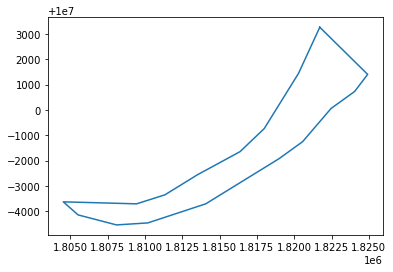

In [19]:
plt.plot(*polygon.exterior.xy)

### Simplify the polygon

Modify the tolerance numpy to see how the result changes. 

In [ ]:
polygon_simplify = polygon.simplify(tolerance=200)

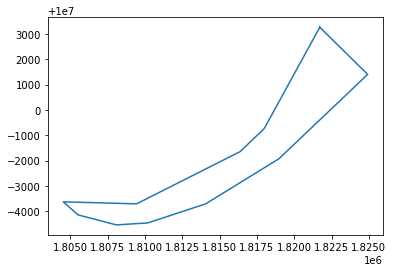

In [24]:
plt.plot(*polygon_simplify.exterior.xy)

### Save simplified polygon into polygon collection

In [60]:
outpoly = PolyCol.create_polygon('simplified_polygon')

In [61]:
outpoly_points = list(polygon_simplify.exterior.coords)
segment = GeoIoShapeSegment()
segment.set_points(outpoly_points)
segments = list()
segments.append(segment)

In [62]:
outpoly.set_segments(segments)

(<geoio.GeoIoShapeSegment; proxy of <Swig Object of type 'GeoIoShapeSegment *' at 0x2aaab39a7f60> >,)